Inertia:  3577.3594384370917
Centroids are:  [[7.39129386e-01 2.97191099e-03 4.19165705e-01 7.29571136e-01
  5.41824159e-01 1.68313622e-01 3.30675073e-01 3.96631820e-01
  1.51938998e-01 5.92598150e-02 7.63071895e-01 1.03758170e-01
  6.40363366e-01 5.74846019e-01 5.80490473e-01 2.62532848e-02
  1.73472348e-18 5.23420479e-02 8.39869281e-02 4.62989212e-01
  4.20157457e-01 1.68556272e-01 1.07321087e-01 1.64337626e-01
  4.43851108e-01 3.18705734e-01 3.40629019e-01 3.75564437e-01
  4.40960172e-01 7.20820345e-01 5.10893530e-01]
 [2.55142371e-01 3.34758251e-02 3.79619879e-01 2.49774263e-01
  5.90741483e-01 1.14791810e-01 1.79484879e-01 1.88139210e-01
  1.04040921e-01 7.19650179e-02 6.39386189e-01 1.32992327e-01
  2.55861713e-01 2.59032850e-01 1.83135136e-01 4.83824189e-02
  8.52514919e-04 1.09481860e-01 2.02728048e-01 4.13408108e-01
  4.45245292e-01 1.30601028e-01 1.20413885e-01 1.11704903e-01
  5.15003234e-01 3.14306210e-01 3.31701836e-01 3.26942124e-01
  2.85318297e-01 7.51893057e-01 3.23773

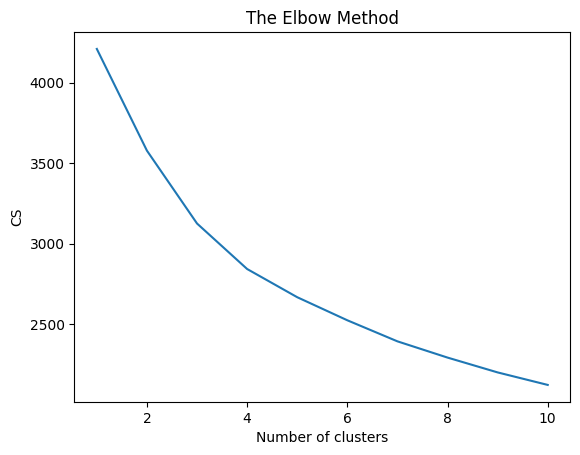




Inertia:  3124.3405325418935
Centroids are:  [[7.38168905e-01 2.95989666e-03 3.83041996e-01 7.27643742e-01
  5.57722877e-01 2.23866283e-01 3.61556932e-01 4.11741864e-01
  2.01265927e-01 9.14676598e-02 6.99136868e-01 1.12207152e-01
  6.81973640e-01 7.03415217e-01 5.11658899e-01 3.83896678e-02
  1.40946282e-18 8.43677216e-02 1.37361282e-01 4.46719059e-01
  4.38852147e-01 1.49324747e-01 1.09534069e-01 2.20126249e-01
  5.22709055e-01 3.18112882e-01 3.87714744e-01 3.09278285e-01
  1.11507930e-01 7.25873103e-01 3.76604167e-01]
 [2.51012727e-01 3.50063122e-02 3.68473582e-01 2.45665022e-01
  6.05603751e-01 1.19561009e-01 1.88460179e-01 1.86674713e-01
  1.07203959e-01 8.07705903e-02 6.03393425e-01 1.42099682e-01
  2.57197406e-01 2.64470190e-01 1.72470358e-01 5.61926731e-02
  1.06044539e-03 1.31565924e-01 2.43054083e-01 3.98254737e-01
  4.54063434e-01 1.15064103e-01 1.22297683e-01 1.16712303e-01
  5.54005940e-01 3.12168149e-01 3.42803978e-01 2.94823618e-01
  1.52994471e-01 7.60739039e-01 2.45

In [4]:
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

data = '../lab2/Billionaires Statistics Dataset.csv'
df = pd.read_csv(data)

for column in df:
    if df[column].dtype == 'object':
        df[column] = pd.factorize(df[column])[0]

df.dropna(inplace=True)

df.drop('industries', axis=1, inplace=True)
df.drop('status', axis=1, inplace=True)
df.drop('life_expectancy_country', axis=1, inplace=True)
df.drop('birthDay', axis=1, inplace=True)

X = df

y = df['country']

le = LabelEncoder()

X['country'] = le.fit_transform(X['country'])

y = le.transform(y)

cols = X.columns

ms = MinMaxScaler()

X = ms.fit_transform(X)

X = pd.DataFrame(X, columns=[cols])

kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)

print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 2)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))

cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("\n\n")
print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 3)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)

kmeans.fit(X)

labels = kmeans.labels_

correct_labels = sum(y == labels)
print("\n\n")
print("Inertia: ", kmeans.inertia_)
print("Centroids are: ", kmeans.cluster_centers_)
print("Clusters ", 4)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'.format(correct_labels / float(y.size)))
print("Number of occurrences: ", Counter(labels))